This notebook plots mode shift data from the dashboard download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')

In [2]:
# import mode share dat
ms = pd.read_csv(f'./../TEAM-Kenya_data_out/dashboard-data-out/mode-shares.csv')
ms

,Year,Scenario,MSMode,Value
0,2015,"Omoka (""Growth"")",walk,312.819231
1,2015,"Omoka (""Growth"")",bicycle,28.438111
2,2015,"Omoka (""Growth"")",car/van driver,91.527351
3,2015,"Omoka (""Growth"")",car/van passenger,42.243393
4,2015,"Omoka (""Growth"")",motorcycle + e-bike,107.240118
...,...,...,...,...
187,2050,Streetfighting,rail (surface),1.606753
188,2050,Streetfighting,other private (+car clubs),2.816226
189,2050,Streetfighting,taxi + Uber,4.224339
190,2050,Streetfighting,air,6.997197


In [3]:
# define groupings
mode_groupings = {'Walk': ['walk'], 'Bike': ['bicycle'], 'Moto': ['motorcycle + e-bike'], 'Car': ['car/van driver', 'car/van passenger', 'taxi + Uber'], 'Bus/Matatu': ['local bus', 'coach'], 'Train': ['rail (surface)'], 'Other Private': ['other private (+car clubs)'], 'Other Public': ['other public + underground'], 'Air': ['air']}

# define scenarios and years
scenarios = ['Omoka ("Growth")',
 'Electric Dreams',
 'Kujinao ("Know yourself")',
 'Streetfighting']

years = [2015, 2030, 2040, 2050]

In [4]:
# group chart data by mode
chart_data = {}

for mode in mode_groupings:

    data_list = []
    
    for scenario in scenarios:
        
        for year in years:
            
            if year == 2015:
                if scenario == 'Omoka ("Growth")':
                    data_list.append(100 * ms[(ms['Scenario'] == scenario) & (ms['Year'] == year) & (ms['MSMode'].isin(mode_groupings[mode]))]['Value'].sum() / ms[(ms['Scenario'] == 'Omoka ("Growth")') & (ms['Year'] == year)]['Value'].sum())       

            else:
                data_list.append(100 * ms[(ms['Scenario'] == scenario) & (ms['Year'] == year) & (ms['MSMode'].isin(mode_groupings[mode]))]['Value'].sum() / ms[(ms['Scenario'] == scenario) & (ms['Year'] == year)]['Value'].sum())         
                               
    chart_data[mode] = data_list

In [5]:
labels = ('Baseline 2015',
          'Omoka 2030',
          'Omoka 2040',
          'Omoka 2050',
          'Electric Dreams 2030',
          'Electric Dreams 2040',
          'Electric Dreams 2050',
          'Kujinao 2030',
          'Kujinao 2040',
          'Kujinao 2050',
          'Streetfighting 2030',
          'Streetfighting 2040',
          'Streetfighting 2050')

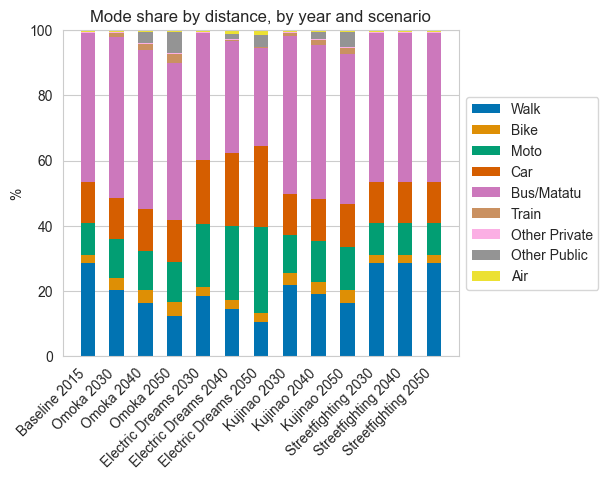

In [6]:
# colour by mode
clr_palette = sns.color_palette('colorblind')
clrs = {}
cnt=0
for mode in mode_groupings:
    clrs[mode] = clr_palette[cnt]
    cnt+=1

fig, ax = plt.subplots()

bottom = np.zeros(len(labels))

width = 0.5

for cat in chart_data:
    p = ax.bar(labels, chart_data[cat], width, label=cat, bottom=bottom, color= clrs[cat], linewidth=0)
    bottom += chart_data[cat]
    
fig.autofmt_xdate(rotation=45)

ax.set_title('Mode share by distance, by year and scenario')

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(top=100)

ax.set_ylabel('%')

#fig.tight_layout(w_pad=2)

fig.savefig('mode-shares.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

#plt.savefig('total-pj-consumption.pdf')

In [7]:
chart_data

{'Walk': [28.537295327824914,
  20.421196043651403,
  16.42071269470243,
  12.420230521584578,
  18.584930367216856,
  14.501102771021863,
  10.417275915908471,
  22.02800919479942,
  19.222660807734268,
  16.417312167963207,
  28.537295327824914,
  28.537295327824914,
  28.537295327824914],
 'Bike': [2.594299531551189,
  3.749877184011578,
  3.9735401625013553,
  4.19720280651162,
  2.7405598538555913,
  2.798000823958455,
  2.8554416380768055,
  3.4872908966829916,
  3.7184104874810306,
  3.9495298924390503,
  2.594299531551189,
  2.594299531551189,
  2.594299531551189],
 'Moto': [9.783103560616578,
  11.655744154487921,
  11.921172567212288,
  12.186600544563177,
  19.150743215123228,
  22.78804635371844,
  26.42534954552812,
  11.616314743449204,
  12.408471492194503,
  13.200628667614042,
  9.783103560616578,
  9.783103560616578,
  9.783103560616578],
 'Car': [12.588760701440393,
  12.733034026259432,
  12.810695589674054,
  12.88835662233662,
  19.706493220762226,
  22.2108371188